In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Modelos


In [53]:
def black_scholes_call(S, K, r, sigma, T, type_option):
    """
    Calcula el precio de una opción de compra (call) o venta (put) utilizando el modelo de Black-Scholes.

    Parámetros:
    S : float
        Precio del activo subyacente.
    K : float
        Precio de ejercicio de la opción.
    r : float
        Tasa de interés libre de riesgo.
    sigma : float
        Volatilidad del activo subyacente.
    T : float
        Tiempo hasta el vencimiento de la opción, en años.
    type_option : str
        Tipo de opción ('call' para opción de compra, 'put' para opción de venta).

    Retorna:
    float
        Precio de la opción según el modelo de Black-Scholes.
    """
    # Calcula los parámetros d1 y d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calcula el precio de la opción según el tipo (call o put)
    if type_option == 'call':
        call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        return call_price
    elif type_option == 'put':
        put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        return put_price


In [56]:
def merton_jump_diffusion(S, K, r, sigma, T, lambd, v_jump, type_option, max_n):
    """
    Calcula el precio de una opción (call o put) utilizando el modelo de Merton con difusión de saltos.

    Parámetros:
    S : float
        Precio del activo subyacente.
    K : float
        Precio de ejercicio de la opción.
    r : float
        Tasa de interés libre de riesgo.
    sigma : float
        Volatilidad del activo subyacente.
    T : float
        Tiempo hasta el vencimiento de la opción, en años.
    lambd : float
        Intensidad de los saltos (lambda).
    v_jump : float
        Volatilidad de los saltos.
    type_option : str
        Tipo de opción ('call' para opción de compra, 'put' para opción de venta).
    max_n : int
        Número máximo de saltos para la sumatoria.

    Retorna:
    float
        Precio de la opción según el modelo de Merton con difusión de saltos.
    """
    c_merton = 0  # Inicializa el precio de la opción
    factorial = 1  # Inicializa el factorial
    
    # Itera sobre el número de saltos máximo
    for n in range(max_n):
        factorial *= n + 1  # Calcula el factorial
        poisson_prob = np.exp(-lambd * (T)) * (lambd * (T))**n / factorial  # Probabilidad de Poisson
        S_jump = S * np.exp(-lambd * v_jump * (T))**(n)  # Precio del activo subyacente ajustado por los saltos
        # Calcula el precio de la opción y lo agrega al precio acumulado
        c_merton += poisson_prob * black_scholes_call(S_jump, K, r, sigma, T, type_option)
    
    return c_merton


## Ejemplo 1

In [66]:
# Parámetros
S = 100  # Precio del activo subyacente
K = 101  # Precio de ejercicio
r = 0.0529  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo hasta el vencimiento
lambd = 0.1  # Intensidad de los saltos
v_jump = 0.2  # Volatilidad de los saltos
max_ns = 20 # Número máximo de saltos para la sumatoria

# Calcular precios de las opciones para diferentes posiciones (call, put)
call_01 = merton_jump_diffusion(S, K, r, sigma, T, lambd, v_jump, 'call', max_ns) 
put_01 = merton_jump_diffusion(S, K, r, sigma, T, lambd, v_jump, 'put', max_ns) 

print(f'El precio de la prima de la opción tipo call es: {call_01}')
print(f'El precio de la prima de la  opción tipo put es: {put_01}')

El precio de la prima de la opción tipo call es: 9.533363098800764
El precio de la prima de la  opción tipo put es: 5.6284140269183025


## Ejemplo 2 - número de iteraciones

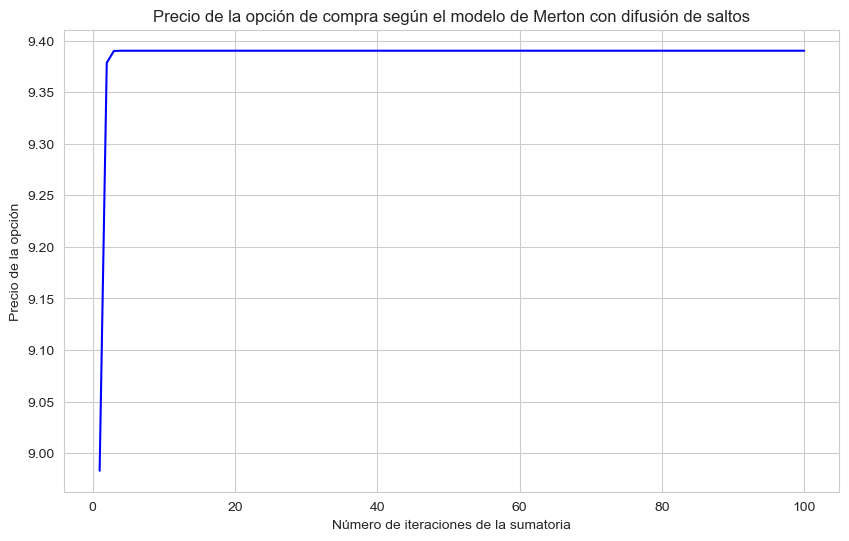

In [72]:
# Parámetros
S = 100  # Precio del activo subyacente
K = 101  # Precio de ejercicio
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo hasta el vencimiento
lambd = 0.1  # Intensidad de los saltos
v_jump = 0.2  # Volatilidad de los saltos
max_ns = np.arange(1, 101)  # Número máximo de saltos para la sumatoria (de 1 a 100)

# Calcular precios de las opciones para diferentes números de iteraciones de la sumatoria
call_prices = [merton_jump_diffusion(S, K, r, sigma, T, lambd, v_jump, 'call', max_n) for max_n in max_ns]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(max_ns, call_prices, linestyle='-', color='b')
plt.title('Precio de la opción de compra según el modelo de Merton con difusión de saltos')
plt.xlabel('Número de iteraciones de la sumatoria')
plt.ylabel('Precio de la opción')
plt.grid(True)
plt.show()


## Ejemplo 3 - BS vs BSM

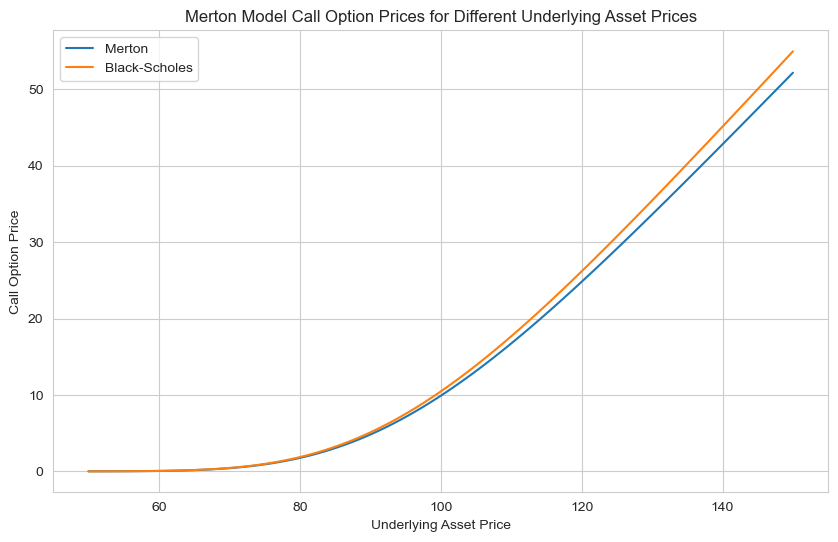

In [85]:

# Parámetros
S = np.linspace(50, 150, 100)  # Rango de precios del activo subyacente
K = 100  # Strike prices for two options
T = 1  # Tiempo hasta el vencimiento en años
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
lambd = 0.1  # Intensidad de los saltos
v_jump = 0.2  # Volatilidad de los saltos
max_n = 100  # Número máximo de saltos para la sumatoria

# Calcular precios de opciones de compra bajo el modelo de Merton para diferentes precios del activo subyacente
call_prices_merton = merton_jump_diffusion(S, K1, r, sigma, T, lambd, v_jump, 'call', max_n)
call_prices_bs = black_scholes_call(S, K, r, sigma, T, 'call')

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(S, call_prices_merton, label='Merton')
plt.plot(S, call_prices_bs, label='Black-Scholes')
plt.title('Merton Model Call Option Prices for Different Underlying Asset Prices')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Call Option Price')
plt.grid(True)
plt.legend()
plt.show()

## Sonrisa de volatilidad

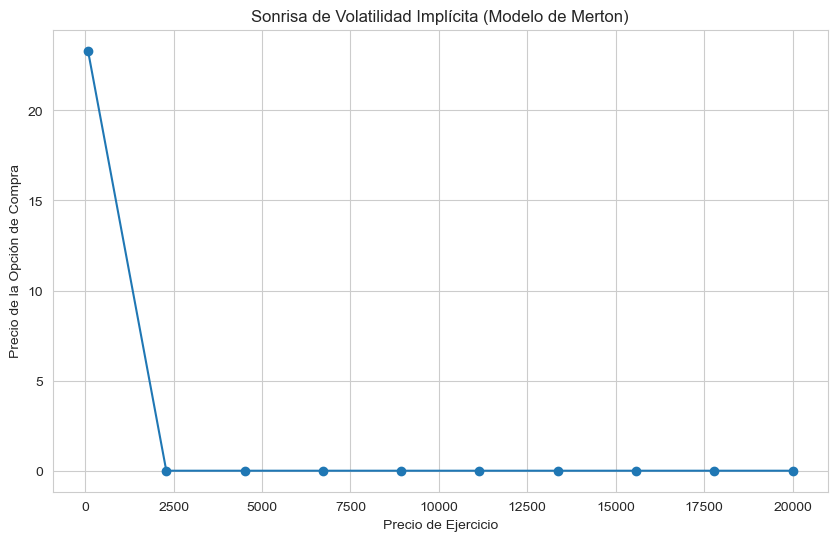

In [95]:

# Parámetros
S = 100  # Precio del activo subyacente
K = np.linspace(80, 20000, 10)  # Precios de ejercicio
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo hasta el vencimiento
lambd = 0.1  # Intensidad de los saltos
v_jump = 0.2  # Volatilidad de los saltos
max_n = 100  # Número máximo de saltos para la sumatoria

# Calcular los precios de las opciones de compra bajo el modelo de Merton para diferentes precios de ejercicio
call_prices_merton = [merton_jump_diffusion(S, K_i, r, sigma, T, lambd, v_jump, 'call', max_n) for K_i in K]

# Graficar la sonrisa de volatilidad implícita
plt.figure(figsize=(10, 6))
plt.plot(K, call_prices_merton, marker='o')
plt.title('Sonrisa de Volatilidad Implícita (Modelo de Merton)')
plt.xlabel('Precio de Ejercicio')
plt.ylabel('Precio de la Opción de Compra')
plt.grid(True)
plt.show()